# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Avoiding overfitting with XGBoost on a classification problem

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [33]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 5
rcParams['font.size'] = 20

# Load & split the dataset
<hr style="border:2px solid black"> </hr>

In [4]:
dataset = loadtxt('../DATASETS/pima-indians-diabetes.csv', delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Fit the model
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- We can see that the classification error is reported each training iteration (after each boosted tree is added to the model).
- This can be see in a more elegant way by plotting the learning curves

</font>
</div>


In [9]:
# fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.259843
[1]	validation_0-error:0.26378
[2]	validation_0-error:0.26378
[3]	validation_0-error:0.255906
[4]	validation_0-error:0.255906
[5]	validation_0-error:0.26378
[6]	validation_0-error:0.23622
[7]	validation_0-error:0.255906
[8]	validation_0-error:0.248031
[9]	validation_0-error:0.248031
[10]	validation_0-error:0.248031
[11]	validation_0-error:0.232283
[12]	validation_0-error:0.228346
[13]	validation_0-error:0.228346
[14]	validation_0-error:0.228346
[15]	validation_0-error:0.228346
[16]	validation_0-error:0.228346
[17]	validation_0-error:0.228346
[18]	validation_0-error:0.224409
[19]	validation_0-error:0.232283
[20]	validation_0-error:0.232283
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.232283
[24]	validation_0-error:0.228346
[25]	validation_0-error:0.228346
[26]	validation_0-error:0.224409
[27]	validation_0-error:0.224409
[28]	validation_0-error:0.228346
[29]	validation_0-error:0.232283
[30]	validation_0-error:0.

XGBClassifier()

In [28]:
results = model.evals_result()
results["validation_0"]["error"]

[0.259843,
 0.26378,
 0.26378,
 0.255906,
 0.255906,
 0.26378,
 0.23622,
 0.255906,
 0.248031,
 0.248031,
 0.248031,
 0.232283,
 0.228346,
 0.228346,
 0.228346,
 0.228346,
 0.228346,
 0.228346,
 0.224409,
 0.232283,
 0.232283,
 0.23622,
 0.23622,
 0.232283,
 0.228346,
 0.228346,
 0.224409,
 0.224409,
 0.228346,
 0.232283,
 0.228346,
 0.224409,
 0.224409,
 0.228346,
 0.228346,
 0.224409,
 0.228346,
 0.224409,
 0.216535,
 0.220472,
 0.216535,
 0.216535,
 0.216535,
 0.216535,
 0.212598,
 0.224409,
 0.224409,
 0.220472,
 0.224409,
 0.232283,
 0.228346,
 0.224409,
 0.224409,
 0.232283,
 0.228346,
 0.228346,
 0.224409,
 0.224409,
 0.224409,
 0.224409,
 0.224409,
 0.224409,
 0.224409,
 0.224409,
 0.224409,
 0.224409,
 0.220472,
 0.216535,
 0.216535,
 0.216535,
 0.216535,
 0.216535,
 0.216535,
 0.216535,
 0.216535,
 0.216535,
 0.216535,
 0.216535,
 0.216535,
 0.212598,
 0.212598,
 0.212598,
 0.212598,
 0.212598,
 0.208661,
 0.204724,
 0.212598,
 0.212598,
 0.212598,
 0.204724,
 0.208661,
 0.20

In [8]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


# Learning curves
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- We are poviding two different metrics as it is difficult to see which one is best.
- In my experience, some metrics are more suited to show the kink to properly identified the correct stoppoing round
- **Logloss plot**: we can clearly see there is an opportunity to stop the learning early around epoch 20 to epoch 40.
- **Classification error** we see a similar trend but is not as clear as the logloss plot.
- I use them both just to corroborate where I think we should stop the training.
- However, we;ll see how this can be automated.

</font>
</div>

In [29]:
# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.22179	validation_0-logloss:0.655153	validation_1-error:0.259843	validation_1-logloss:0.660186
[1]	validation_0-error:0.202335	validation_0-logloss:0.623322	validation_1-error:0.26378	validation_1-logloss:0.634854
[2]	validation_0-error:0.196498	validation_0-logloss:0.596814	validation_1-error:0.26378	validation_1-logloss:0.61224
[3]	validation_0-error:0.200389	validation_0-logloss:0.574027	validation_1-error:0.255906	validation_1-logloss:0.593118
[4]	validation_0-error:0.202335	validation_0-logloss:0.553853	validation_1-error:0.255906	validation_1-logloss:0.578303
[5]	validation_0-error:0.202335	validation_0-logloss:0.536789	validation_1-error:0.26378	validation_1-logloss:0.564942
[6]	validation_0-error:0.194553	validation_0-logloss:0.521477	validation_1-error:0.23622	validation_1-logloss:0.555113
[7]	validation_0-error:0.200389	validation_0-logloss:0.507802	validation_1-error:0.255906	validation_1-logloss:0.54499
[8]	validation_0-error:0.194553	validation_0-lo

[68]	validation_0-error:0.118677	validation_0-logloss:0.302821	validation_1-error:0.216535	validation_1-logloss:0.503108
[69]	validation_0-error:0.120623	validation_0-logloss:0.30198	validation_1-error:0.216535	validation_1-logloss:0.502674
[70]	validation_0-error:0.120623	validation_0-logloss:0.29991	validation_1-error:0.216535	validation_1-logloss:0.502662
[71]	validation_0-error:0.122568	validation_0-logloss:0.298055	validation_1-error:0.216535	validation_1-logloss:0.50343
[72]	validation_0-error:0.120623	validation_0-logloss:0.296987	validation_1-error:0.216535	validation_1-logloss:0.504037
[73]	validation_0-error:0.120623	validation_0-logloss:0.295123	validation_1-error:0.216535	validation_1-logloss:0.504439
[74]	validation_0-error:0.118677	validation_0-logloss:0.294368	validation_1-error:0.216535	validation_1-logloss:0.503696
[75]	validation_0-error:0.118677	validation_0-logloss:0.293513	validation_1-error:0.216535	validation_1-logloss:0.504477
[76]	validation_0-error:0.116732	va

XGBClassifier()

In [30]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


In [31]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

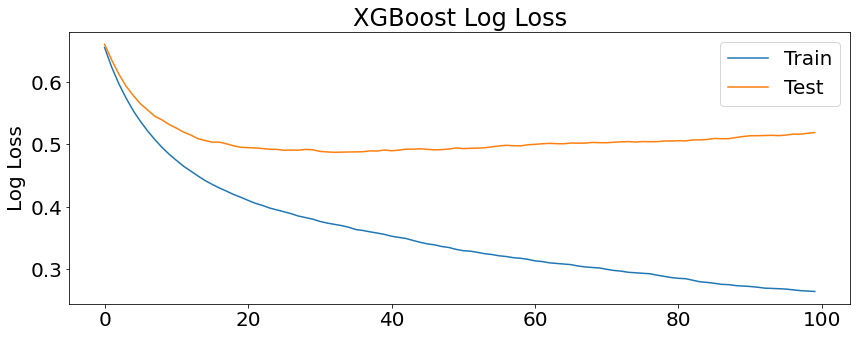

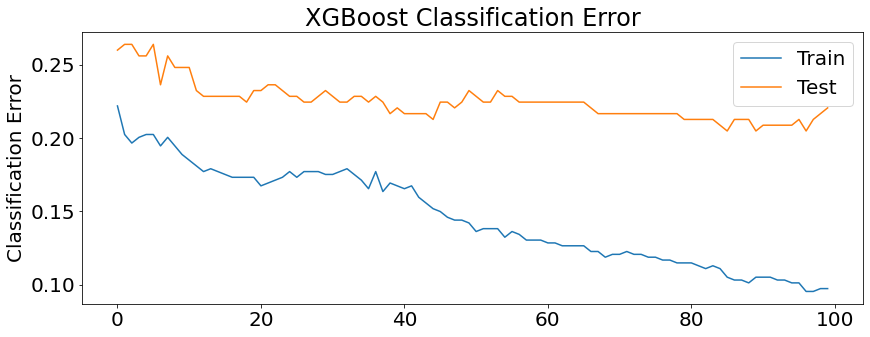

In [37]:
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

# Early stopping
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- We can see that the model stopped training at epoch 42 (close to what we expected by our manual judgment of learning curves) and that the model with the best loss was observed at epoch 32.

</font>
</div>

In [38]:
# fit model no training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.61224
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.519769
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


# Conclusions
<hr style="border:2px solid black"> </hr>

<div class="alert alert-danger">
<font color=black>

- Not every metric function shows an easy to see inflection point to spot where early stopping should happen.
- For classification problem **logloss** seems to be the best option for this.

</font>
</div>

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python

</font>
</div>